In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
        
        
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-detection/Train_data.csv
/kaggle/input/network-intrusion-detection/Test_data.csv


In [40]:
train_data=pd.read_csv('../input/network-intrusion-detection/Train_data.csv')
test_data=pd.read_csv('../input/network-intrusion-detection/Test_data.csv')

In [41]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [43]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [46]:
test_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.000488,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.022084,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
train_data.isnull().sum().sort_values(ascending=True)

duration                       0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
count                          0
is_guest_login                 0
is_host_login                  0
num_outbound_cmds              0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
dst_host_s

In [48]:
print('Number of unique protocol types:',train_data['protocol_type'].nunique())
train_data['protocol_type'].value_counts()
#train_data['service'].value_counts()

Number of unique protocol types: 3


tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [49]:
print('Number of unique values:',train_data['service'].nunique())
print('_______________________________')
print(train_data['service'].value_counts())

Number of unique values: 66
_______________________________
http           8003
private        4351
domain_u       1820
smtp           1449
ftp_data       1396
eco_i           909
other           858
ecr_i           613
telnet          483
finger          366
ftp             345
auth            189
Z39_50          172
courier         164
uucp            157
time            155
bgp             146
whois           145
imap4           138
uucp_path       133
iso_tsap        131
ctf             127
urp_i           124
nnsp            123
supdup          114
http_443        113
csnet_ns        111
efs             110
gopher          109
domain          109
daytime         107
vmnet           107
discard         105
hostnames        96
klogin           92
name             92
exec             91
mtp              90
ldap             90
systat           88
netbios_dgm      85
link             85
login            79
netstat          78
netbios_ns       76
kshell           67
sunrpc           67


In [50]:
print('Number of unique flag:',train_data['flag'].nunique())
train_data['flag'].value_counts()

Number of unique flag: 11


SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
S2           21
RSTOS0       21
S3           15
OTH           5
Name: flag, dtype: int64

In [51]:
test_data.isnull().sum().sort_values(ascending=False)

duration                       0
is_guest_login                 0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
count                          0
is_host_login                  0
protocol_type                  0
num_outbound_cmds              0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot       

In [52]:
print('Number of unique values:',test_data['protocol_type'].nunique())
test_data['protocol_type'].value_counts()

Number of unique values: 3


tcp     18880
udp      2621
icmp     1043
Name: protocol_type, dtype: int64

In [53]:
print('Number of unique values of service:',test_data['service'].nunique())
test_data['service'].value_counts()

Number of unique values of service: 64


http           7853
private        4774
telnet         1626
pop_3          1019
smtp            934
domain_u        894
ftp_data        851
other           838
ecr_i           752
ftp             692
imap4           306
eco_i           262
sunrpc          159
finger          136
auth             67
domain           51
uucp             50
iso_tsap         48
bgp              46
uucp_path        46
Z39_50           45
vmnet            43
nnsp             42
ctf              41
link             41
whois            40
courier          40
echo             37
name             37
time             36
netbios_ns       36
http_443         36
gopher           34
csnet_ns         34
efs              33
systat           32
mtp              32
login            29
daytime          28
supdup           27
exec             27
discard          26
netstat          26
ssh              26
netbios_dgm      25
kshell           24
hostnames        23
urp_i            23
nntp             21
klogin           21


In [54]:
print('Number of unique values of flag:',test_data['flag'].nunique())
test_data['flag'].value_counts()

Number of unique values of flag: 11


SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: flag, dtype: int64

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

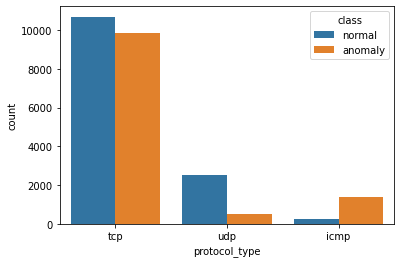

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='protocol_type',hue='class',data=train_data)

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

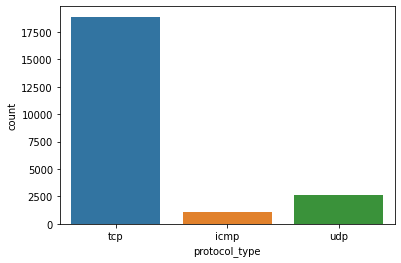

In [56]:
sns.countplot(x='protocol_type',data=test_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, 'ftp_data'),
  Text(1, 0, 'other'),
  Text(2, 0, 'private'),
  Text(3, 0, 'http'),
  Text(4, 0, 'remote_job'),
  Text(5, 0, 'name'),
  Text(6, 0, 'netbios_ns'),
  Text(7, 0, 'eco_i'),
  Text(8, 0, 'mtp'),
  Text(9, 0, 'telnet'),
  Text(10, 0, 'finger'),
  Text(11, 0, 'domain_u'),
  Text(12, 0, 'supdup'),
  Text(13, 0, 'uucp_path'),
  Text(14, 0, 'Z39_50'),
  Text(15, 0, 'smtp'),
  Text(16, 0, 'csnet_ns'),
  Text(17, 0, 'uucp'),
  Text(18, 0, 'netbios_dgm'),
  Text(19, 0, 'urp_i'),
  Text(20, 0, 'auth'),
  Text(21, 0, 'domain'),
  Text(22, 0, 'ftp'),
  Text(23, 0, 'bgp'),
  Text(24, 0, 'ldap'),
  Text(25, 0, 'ecr_i'),
  Text(26, 0, 'gopher'),
  Text(27, 0, 'vmnet'),
  Text(28, 0, '

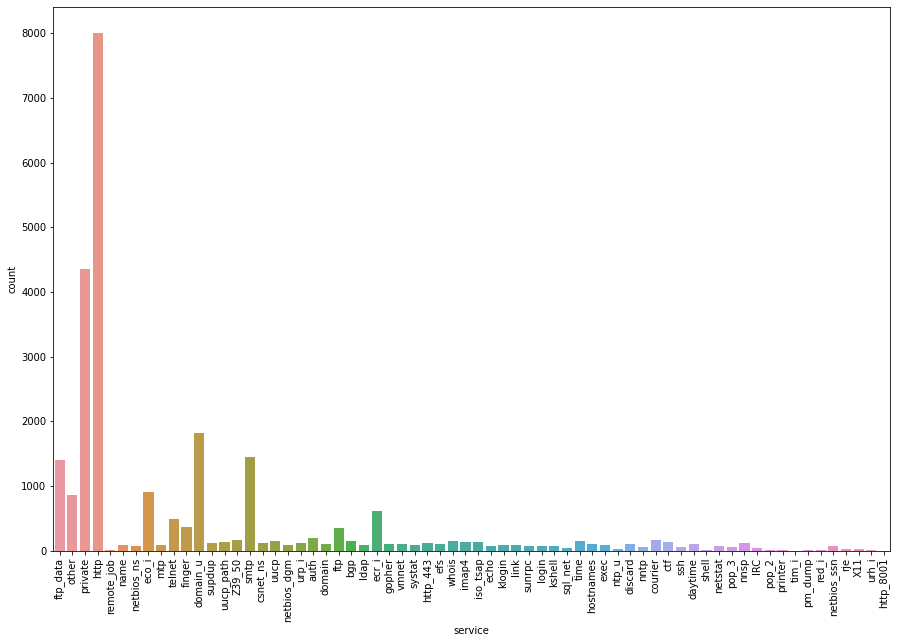

In [57]:
plt.figure(figsize=(15,10))
sns.countplot(x='service',data=train_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, 'private'),
  Text(1, 0, 'ftp_data'),
  Text(2, 0, 'eco_i'),
  Text(3, 0, 'telnet'),
  Text(4, 0, 'http'),
  Text(5, 0, 'smtp'),
  Text(6, 0, 'ftp'),
  Text(7, 0, 'ldap'),
  Text(8, 0, 'pop_3'),
  Text(9, 0, 'courier'),
  Text(10, 0, 'discard'),
  Text(11, 0, 'ecr_i'),
  Text(12, 0, 'imap4'),
  Text(13, 0, 'domain_u'),
  Text(14, 0, 'mtp'),
  Text(15, 0, 'systat'),
  Text(16, 0, 'iso_tsap'),
  Text(17, 0, 'other'),
  Text(18, 0, 'csnet_ns'),
  Text(19, 0, 'finger'),
  Text(20, 0, 'uucp'),
  Text(21, 0, 'whois'),
  Text(22, 0, 'netbios_ns'),
  Text(23, 0, 'link'),
  Text(24, 0, 'Z39_50'),
  Text(25, 0, 'sunrpc'),
  Text(26, 0, 'auth'),
  Text(27, 0, 'netbios_dgm'),
  Text(28, 0, 'uucp_path

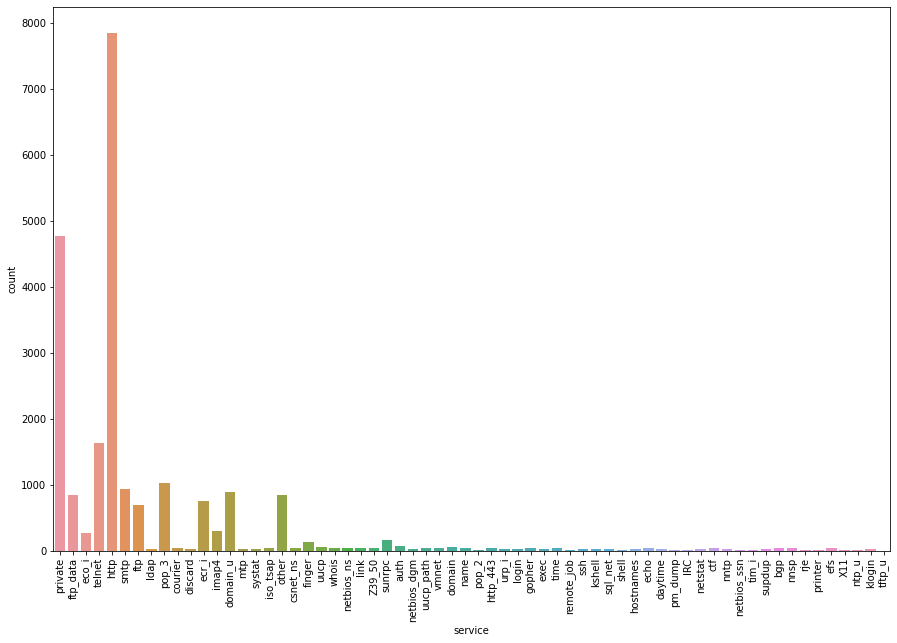

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(x='service',data=test_data)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='service', ylabel='count'>

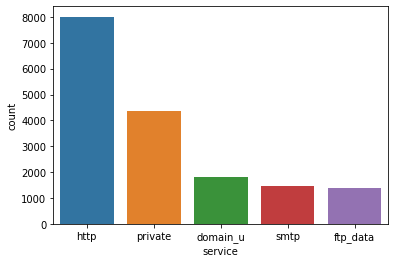

In [59]:
order=train_data['service'].value_counts().head(5).index
sns.countplot(x='service',data=train_data,order=order)

<AxesSubplot:xlabel='service', ylabel='count'>

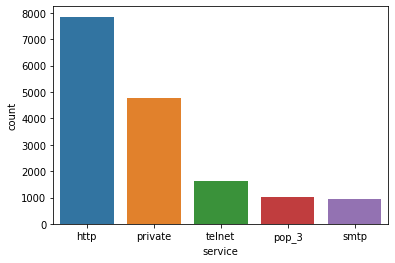

In [60]:
order=test_data['service'].value_counts().head(5).index
sns.countplot(x='service',data=test_data,order=order)

<AxesSubplot:xlabel='service', ylabel='count'>

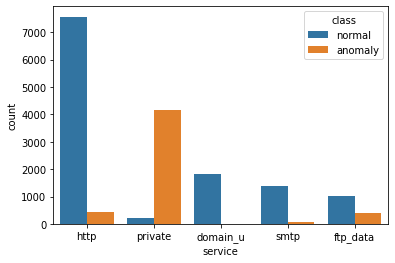

In [61]:
order=train_data['service'].value_counts().head(5).index
sns.countplot(x='service',hue='class',data=train_data,order=order)

<AxesSubplot:xlabel='service', ylabel='count'>

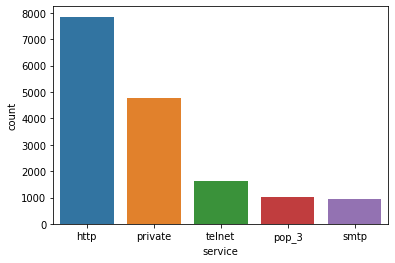

In [62]:
order=test_data['service'].value_counts().head(5).index
sns.countplot(x='service',data=test_data,order=order)

In [63]:
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH        

SyntaxError: invalid syntax (<ipython-input-63-6a5bd1196e6b>, line 1)

In [64]:
convert_num={"protocol_type":{"tcp":1,"udp":2,"icmp":3},
              "flag":{"SF":0,"S0":1,"REJ":2,"RSTR":3,"RSTO":4,"S1":5,"SH":6,"RSTOS0":7,"S2":8,"S3":9,"OTH":10},
            "class":{"normal":0,"anomaly":1}}

In [65]:
train_data=train_data.replace(convert_num)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,ftp_data,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,other,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,private,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,http,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,http,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [66]:
covert_num_test={"protocol_type":{"tcp":1,"udp":2,"icmp":3},
              "flag":{"SF":0,"S0":1,"REJ":2,"RSTR":3,"RSTO":4,"S1":5,"SH":6,"RSTOS0":7,"S2":8,"S3":9,"OTH":10}}

In [67]:

test_data=test_data.replace(covert_num_test)
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,private,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,private,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,ftp_data,0,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,3,eco_i,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,telnet,4,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
label=LabelEncoder()
train_data['service']=label.fit_transform(train_data['service'])
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,41,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,22,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,22,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [70]:
label_test=LabelEncoder()
test_data['service']=label_test.fit_transform(test_data['service'])

In [71]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,45,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,19,0,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,3,13,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,55,4,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [72]:
corr=train_data.corr()

In [73]:
corr

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,-0.012083,0.101301,0.182957,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,0.050547,0.094243,0.094066,0.088272,-0.001585,0.070206,NaN,NaN,-0.002050,-0.081787,-0.040642,-0.072458,-0.071832,0.209441,0.208354,0.075723,-0.012009,-0.041115,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,0.050901
protocol_type,-0.012083,1.000000,-0.246389,-0.278870,-0.004442,-0.017287,-0.003956,0.130640,-0.002797,-0.040819,-0.011642,-0.358593,-0.009712,-0.017484,-0.012284,-0.009646,-0.012347,-0.008394,-0.019499,NaN,NaN,-0.042620,0.070024,0.531107,-0.281696,-0.281492,-0.164776,-0.165659,0.259481,-0.007753,0.268318,-0.080166,0.067524,0.206310,-0.016446,0.566059,0.370650,-0.279933,-0.278556,-0.134759,-0.166184,0.048654
service,0.101301,-0.246389,1.000000,0.258448,0.008554,-0.013782,-0.006896,0.088169,0.011325,-0.056165,0.029601,-0.138824,0.037699,0.038780,0.049729,0.035444,0.041996,-0.007069,0.032292,NaN,NaN,-0.068121,0.087957,-0.258859,0.272030,0.269414,0.142616,0.140916,-0.357572,0.203359,-0.092762,0.184684,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865,0.270494
flag,0.182957,-0.278870,0.258448,1.000000,0.040052,-0.014498,0.003591,-0.057295,-0.003957,-0.051984,0.034897,-0.433649,-0.004077,0.001294,0.018699,-0.003958,0.003323,-0.011873,-0.019275,NaN,NaN,-0.056846,0.295327,-0.170776,0.323910,0.313592,0.666421,0.668530,-0.479810,0.201044,-0.174701,0.228691,-0.466101,-0.503705,0.329603,-0.049946,-0.073225,0.274847,0.278630,0.599209,0.647636,0.501417
src_bytes,0.084864,-0.004442,0.008554,0.040052,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,-0.000383,-0.000267,-0.000209,-0.000218,-0.000158,-0.000422,NaN,NaN,-0.000932,-0.007302,-0.003623,-0.006312,-0.006225,0.016015,0.015816,0.007673,-0.003098,-0.003077,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,0.005743
dst_bytes,0.013258,-0.017287,-0.013782,-0.014498,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,0.020214,0.035041,0.035171,0.008456,-0.000146,0.024142,NaN,NaN,-0.001161,-0.027824,-0.012524,-0.022390,-0.022443,-0.013843,-0.013664,0.030018,-0.012300,-0.007560,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803,-0.010949
land,-0.001012,-0.003956,-0.006896,0.003591,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,-0.000351,-0.000247,-0.000194,-0.000248,-0.000168,-0.000391,NaN,NaN,-0.000855,-0.006495,-0.003221,0.014216,0.014259,-0.003316,-0.003324,0.006880,-0.003112,0.014033,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335,0.000605
wrong_fragment,-0.010358,0.130640,0.088169,-0.057295,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,-0.003592,-0.002524,-0.001982,-0.002537,-0.001725,-0.004006,NaN,NaN,-0.008756,-0.023241,0.023377,-0.045228,-0.057834,-0.033464,-0.034035,0.056683,-0.027428,-0.028744,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143,0.097625
urgent,-0.000486,-0.002797,0.011325,-0.003957,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,0.160007,-0.000174,0.007533,0.011722,-0.000119,-0

<AxesSubplot:>

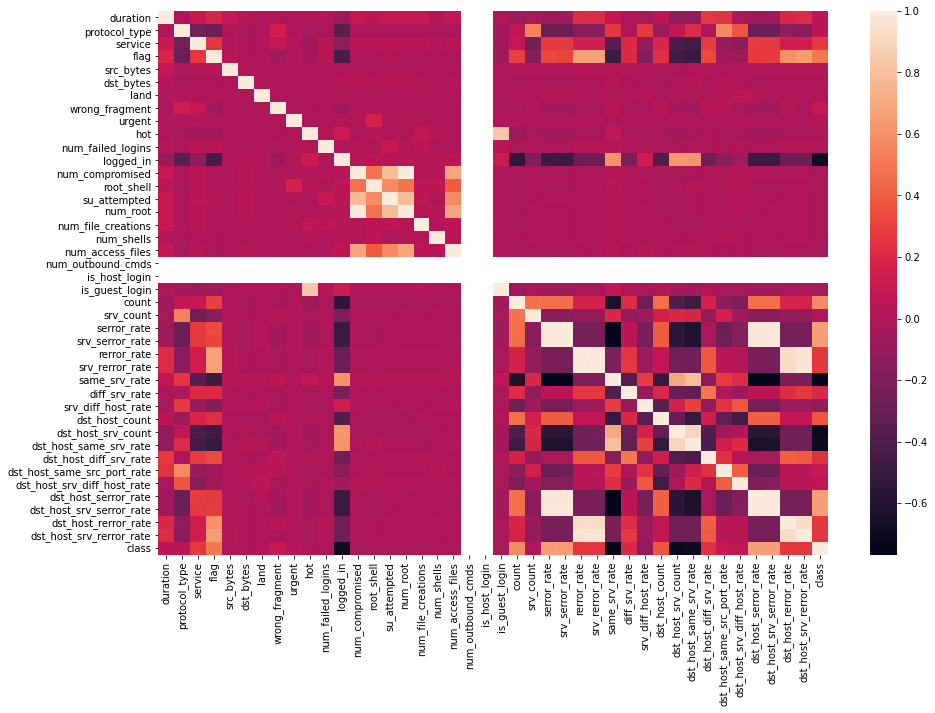

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(corr)

In [77]:
train_data.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [78]:
corr_train_data=train_data.corr()

In [79]:
corr_train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,-0.012083,0.101301,0.182957,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,0.050547,0.094243,0.094066,0.088272,-0.001585,0.070206,-0.002050,-0.081787,-0.040642,-0.072458,-0.071832,0.209441,0.208354,0.075723,-0.012009,-0.041115,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,0.050901
protocol_type,-0.012083,1.000000,-0.246389,-0.278870,-0.004442,-0.017287,-0.003956,0.130640,-0.002797,-0.040819,-0.011642,-0.358593,-0.009712,-0.017484,-0.012284,-0.009646,-0.012347,-0.008394,-0.019499,-0.042620,0.070024,0.531107,-0.281696,-0.281492,-0.164776,-0.165659,0.259481,-0.007753,0.268318,-0.080166,0.067524,0.206310,-0.016446,0.566059,0.370650,-0.279933,-0.278556,-0.134759,-0.166184,0.048654
service,0.101301,-0.246389,1.000000,0.258448,0.008554,-0.013782,-0.006896,0.088169,0.011325,-0.056165,0.029601,-0.138824,0.037699,0.038780,0.049729,0.035444,0.041996,-0.007069,0.032292,-0.068121,0.087957,-0.258859,0.272030,0.269414,0.142616,0.140916,-0.357572,0.203359,-0.092762,0.184684,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865,0.270494
flag,0.182957,-0.278870,0.258448,1.000000,0.040052,-0.014498,0.003591,-0.057295,-0.003957,-0.051984,0.034897,-0.433649,-0.004077,0.001294,0.018699,-0.003958,0.003323,-0.011873,-0.019275,-0.056846,0.295327,-0.170776,0.323910,0.313592,0.666421,0.668530,-0.479810,0.201044,-0.174701,0.228691,-0.466101,-0.503705,0.329603,-0.049946,-0.073225,0.274847,0.278630,0.599209,0.647636,0.501417
src_bytes,0.084864,-0.004442,0.008554,0.040052,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,-0.000383,-0.000267,-0.000209,-0.000218,-0.000158,-0.000422,-0.000932,-0.007302,-0.003623,-0.006312,-0.006225,0.016015,0.015816,0.007673,-0.003098,-0.003077,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,0.005743
dst_bytes,0.013258,-0.017287,-0.013782,-0.014498,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,0.020214,0.035041,0.035171,0.008456,-0.000146,0.024142,-0.001161,-0.027824,-0.012524,-0.022390,-0.022443,-0.013843,-0.013664,0.030018,-0.012300,-0.007560,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803,-0.010949
land,-0.001012,-0.003956,-0.006896,0.003591,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,-0.000351,-0.000247,-0.000194,-0.000248,-0.000168,-0.000391,-0.000855,-0.006495,-0.003221,0.014216,0.014259,-0.003316,-0.003324,0.006880,-0.003112,0.014033,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335,0.000605
wrong_fragment,-0.010358,0.130640,0.088169,-0.057295,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,-0.003592,-0.002524,-0.001982,-0.002537,-0.001725,-0.004006,-0.008756,-0.023241,0.023377,-0.045228,-0.057834,-0.033464,-0.034035,0.056683,-0.027428,-0.028744,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143,0.097625
urgent,-0.000486,-0.002797,0.011325,-0.003957,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,0.160007,-0.000174,0.007533,0.011722,-0.000119,-0.000277,-0.000605,-0.004593,-0.002321,-0.004033,-0.003994,-0.002345,-0.002351,0.004865,-0.002201

In [80]:
test_data.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [81]:
corr_test_data=test_data.corr()

In [82]:
corr_test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,-0.060727,0.173343,0.013735,0.002673,0.078951,-0.002741,-0.009193,-0.000048,-0.004688,-0.021159,-0.075685,0.095383,0.019846,0.088308,0.095269,0.000537,0.001630,0.022909,0.000076,-0.090544,-0.046632,-0.021690,-0.026958,-0.039459,-0.035447,0.095709,-0.050109,-0.038697,0.060631,0.010076,0.004985,0.016746,-0.052325,-0.024126,0.093246,0.107698,-0.029375,-0.055959
protocol_type,-0.060727,1.000000,-0.189093,-0.225542,-0.008400,-0.039278,-0.007248,0.123364,-0.008003,-0.046688,-0.059223,-0.366188,-0.006783,-0.020339,-0.005198,-0.005864,-0.005310,-0.009879,-0.021517,-0.070357,0.245558,0.560215,-0.143281,-0.142873,-0.235269,-0.232393,0.163480,-0.014669,0.009589,0.055773,0.142091,0.211367,-0.004315,0.621517,0.252012,-0.141888,-0.145077,-0.225533,-0.232569
service,0.173343,-0.189093,1.000000,0.310647,-0.029378,-0.029529,-0.018011,0.020846,0.029643,-0.080366,0.158050,-0.321984,0.022354,0.057556,0.020631,0.023232,0.001968,0.039214,0.013550,-0.161499,0.159983,-0.115281,0.190662,0.188345,0.268019,0.259164,-0.363244,0.220920,0.002697,0.281052,-0.379541,-0.447589,0.228432,-0.138883,-0.178545,0.213591,0.232723,0.309974,0.290578
flag,0.013735,-0.225542,0.310647,1.000000,-0.005510,-0.036081,0.002597,-0.032412,-0.010671,-0.053812,-0.051049,-0.345671,-0.008871,-0.027120,-0.006931,-0.007820,-0.007080,-0.013173,-0.028691,-0.091958,0.189359,-0.128626,0.314630,0.308330,0.620024,0.616373,-0.413766,0.209909,0.031339,0.237867,-0.412403,-0.479177,0.246972,-0.148403,-0.102221,0.144466,0.185684,0.566254,0.579286
src_bytes,0.002673,-0.008400,-0.029378,-0.005510,1.000000,0.053634,-0.000388,-0.001247,-0.000333,0.002631,-0.003127,-0.009632,-0.000098,-0.000861,-0.000050,-0.000274,-0.000203,-0.000388,-0.001021,-0.003705,-0.012451,-0.006029,-0.007239,-0.007224,-0.005738,-0.005587,0.013744,-0.007687,-0.006796,-0.009418,-0.014236,-0.006796,-0.002920,0.008955,0.004873,-0.007699,-0.007494,-0.010351,-0.009956
dst_bytes,0.078951,-0.039278,-0.029529,-0.036081,0.053634,1.000000,-0.001708,-0.005726,0.017556,0.027913,-0.011167,0.091598,0.089808,0.054135,0.071767,0.088287,0.004721,0.011365,0.038296,-0.011879,-0.055426,-0.025510,-0.019685,-0.019924,-0.053452,-0.052848,0.059869,-0.031762,-0.004087,-0.055142,0.037879,0.041176,-0.030930,-0.019014,0.002876,-0.030166,-0.020413,-0.054114,-0.051588
land,-0.002741,-0.007248,-0.018011,0.002597,-0.000388,-0.001708,1.000000,-0.001042,-0.000343,-0.002001,-0.002538,-0.015692,-0.000291,-0.000872,-0.000223,-0.000251,-0.000228,-0.000423,-0.000922,-0.003015,-0.010699,-0.005763,0.053528,0.052954,-0.010100,-0.009958,0.011094,-0.006398,0.052761,-0.021743,-0.021651,-0.001277,-0.005176,0.025519,0.090885,0.035814,0.042376,-0.010492,-0.009966
wrong_fragment,-0.009193,0.123364,0.020846,-0.032412,-0.001247,-0.005726,-0.001042,1.000000,-0.001150,-0.006710,-0.008511,-0.052625,-0.000975,-0.002923,-0.000747,-0.000843,-0.000763,-0.001420,-0.003092,-0.010111,-0.019795,0.003508,-0.020596,-0.020532,-0.033871,-0.033397,0.037205,-0.021457,0.008955,-0.041468,-0.050786,-0.015477,0.001490,0.070613,0.061633,-0.009629,-0.020849,-0.023886,-0.033422
urgent,-0.000048,-0.008003,0.029643,-0.010671,-0.000333,0.017556,-0.000343,-0.001150,1.000000,0.061980,-0.002802,0.021855,0.070114,0.368833,-0.000246,0.096064,0.023109,0.075524,0.106566,-0.003329,-0.011813,-0.006582,-0.006781,-0.006760,-0.011152,-0.010996,0.012249,-0.007064,-0.007530,-0.027858,-0.019606,-0.006615,0.008989,0.002596,0.011192,-0.00

<AxesSubplot:>

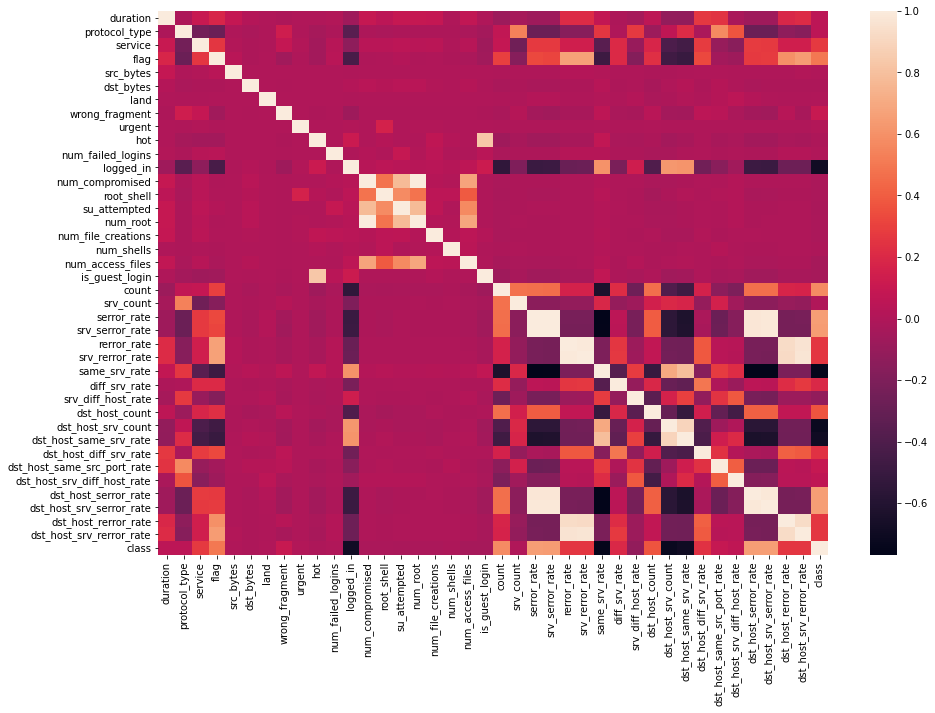

In [84]:
plt.figure(figsize=(15,10))

sns.heatmap(corr_train_data)

<AxesSubplot:>

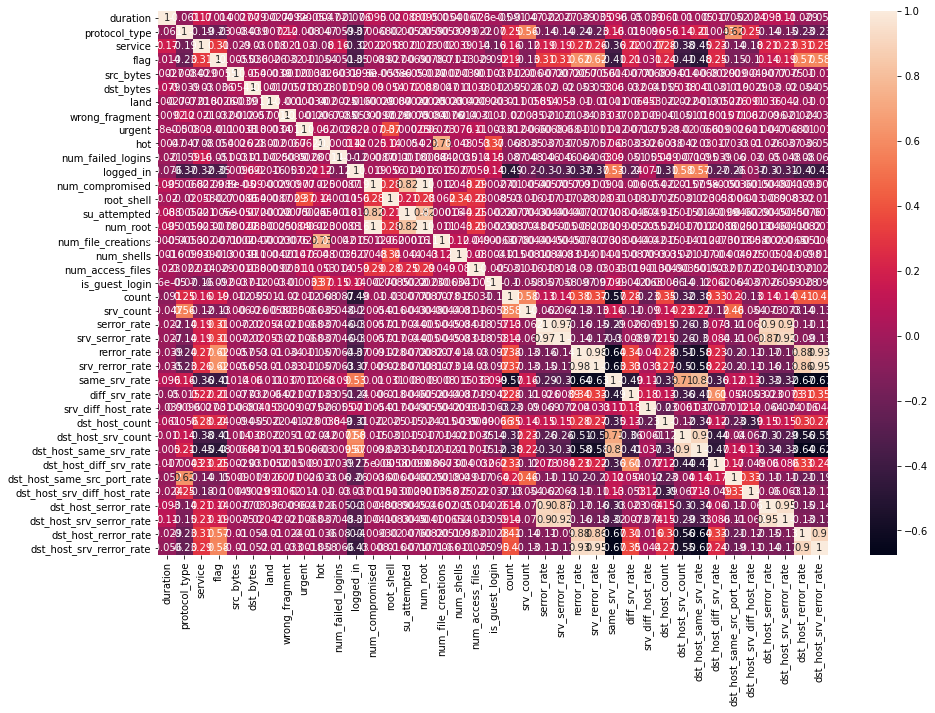

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_test_data,annot=True)

In [102]:
corr_output=abs(corr_train_data['class'])
relevent_feature=corr_output[corr_output>0.5]

In [103]:
relevent_feature

flag                        0.501417
logged_in                   0.688084
count                       0.578790
serror_rate                 0.649952
srv_serror_rate             0.647817
same_srv_rate               0.749237
dst_host_srv_count          0.719292
dst_host_same_srv_rate      0.692212
dst_host_serror_rate        0.651050
dst_host_srv_serror_rate    0.653759
class                       1.000000
Name: class, dtype: float64

In [109]:
X=train_data.drop('class',axis=1)
y=train_data['class']

In [110]:
X.shape,y.shape

((25192, 39), (25192,))

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20153, 39), (5039, 39), (20153,), (5039,))

In [117]:
from sklearn.linear_model import LogisticRegression


In [118]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [120]:
y_predict=lr.predict(X_test)

In [121]:
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [125]:
from sklearn.metrics import f1_score

In [126]:
f1_score(y_test,y_predict)

0.8747863247863248

In [129]:
result=lr.predict(test_data)

In [131]:
final_result=pd.DataFrame(result)

In [132]:
final_result

,0
0,1
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0
